In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [86]:
# Dataset de entrenamiento
df_lr_rec = pd.read_csv('./Resultados/LR_sim_rec-2024.csv', index_col=0)
df_lr_mimo = pd.read_csv('./Resultados/LR_sim_mimo-2024.csv', index_col=0)

df_svr_rec = pd.read_csv('./Resultados/SVR_sim_rec_2023.csv', index_col=0)
df_msver_mimo = pd.read_csv('./Resultados/SVR_sim_MIMO_2023.csv', index_col=0)

df_lstm_rec = pd.read_csv('./Resultados/LSTM_sim_REC_2023.csv', index_col=0)
df_lstm_mimo = pd.read_csv('./Resultados/df_LSTM_sim_MIMO_2023.csv', index_col=0)

df_grnn_rec = pd.read_csv('./Resultados/GRNN_Rec_sim_2023.csv', index_col=0)

In [87]:
df_lr_rec

,Mes,Dia,R2,RMSE,MAE,Modelo,Metodo,Comb,Pronostico
0,Enero,3,-5.424963,0.264077,0.197324,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 7.6 6.7 7.6 8. 7.6 10.3 8.5 10.7 9.4 ...
1,Enero,4,-0.838320,0.228219,0.195394,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 0.9 0. 0. 0. 0. 0. 0. 1.3 2.2 ...
2,Enero,5,-2.024339,0.124901,0.097633,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 4. 3.6 4.9 6.3 5.8 4.5 4.9 5.4 3.6 ...
3,Enero,6,-7.901311,0.243837,0.210231,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 3.6 2.2 1.8 2.2 2.2 2.2 1.3 1.3 0.9 ...
4,Enero,7,-1.543534,0.124116,0.102539,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[11.2 10.7 11.6 12.1 12.1 10.7 10.7 11.2 9.8 ...
...,...,...,...,...,...,...,...,...,...
336,Diciembre,27,-3.723042,0.277607,0.221764,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 1.3 1.3 1.3 1.8 1.3 1.8 2.2 1.3 1.3 ...
337,Diciembre,28,-11.600165,0.237061,0.208814,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[10.7 8.9 10.7 12.5 10.3 8.5 7.6 8.5 9.4 ...
338,Diciembre,29,-2.168100,0.160763,0.133302,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 7.6 7.2 4.5 2.2 2.7 1.8 1.3 1.8 0.9 ...
339,Diciembre,30,-4.480497,0.216652,0.182103,LR,REC,"(['Month', 'Day', 'Hour', 'High Wind Speed m/s...",[ 7.2 9.8 10.3 9.8 10.3 8.9 11.2 11.6 10.7 ...


In [88]:
df_msver_mimo

,Mes,Dia,R2,RMSE,MAE,Modelo,Metodo,Comb,Params
341,Enero,3,0.375159,0.082353,0.062605,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 7.6 6.7 7.6 8. 7.6 10.3 8.5 10.7 9.4 ...
342,Enero,4,0.032596,0.165556,0.142571,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 0.9 0. 0. 0. 0. 0. 0. 1.3 2.2 ...
343,Enero,5,-0.375159,0.084222,0.065226,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 4. 3.6 4.9 6.3 5.8 4.5 4.9 5.4 3.6 ...
344,Enero,6,-0.686228,0.106128,0.086889,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 3.6 2.2 1.8 2.2 2.2 2.2 1.3 1.3 0.9 ...
345,Enero,7,0.064770,0.075261,0.064629,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[11.2 10.7 11.6 12.1 12.1 10.7 10.7 11.2 9.8 ...
...,...,...,...,...,...,...,...,...,...
677,Diciembre,27,-0.358327,0.148875,0.129167,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 1.3 1.3 1.3 1.8 1.3 1.8 2.2 1.3 1.3 ...
678,Diciembre,28,-9.990664,0.221403,0.203457,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[10.7 8.9 10.7 12.5 10.3 8.5 7.6 8.5 9.4 ...
679,Diciembre,29,-1.713194,0.148774,0.119619,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 7.6 7.2 4.5 2.2 2.7 1.8 1.3 1.8 0.9 ...
680,Diciembre,30,-0.206904,0.101669,0.081774,M-SVR,MIMO,"(['High Wind Speed m/s'], 48, 24)",[ 7.2 9.8 10.3 9.8 10.3 8.9 11.2 11.6 10.7 ...


In [89]:
#df_ = pd.concat([df_lr_rec, #3
#                 df_lr_mimo, #6
#                 df_svr_rec, #1
#                df_msver_mimo, #5
#                 df_lstm_rec, #4
#                 df_lstm_mimo, #7
#                 df_grnn_rec], #2
#                ignore_index= True)

df_ = pd.concat([df_svr_rec, df_grnn_rec, df_lr_rec, df_lstm_rec, df_msver_mimo, df_lr_mimo, df_lstm_rec, df_lstm_mimo], ignore_index= True)

In [90]:
df_ = df_.drop(['Pronostico', 'Params'], axis = 1)

In [91]:
df_.rename(columns={"Mes": "Month", "Dia": "Day", "Modelo": "Model"}, inplace=True)

In [92]:
month = {'Enero':'January',
         'Febrero':'February',
         'Marzo':'March',
         'Abril':'April',
         'Mayo':'May',
         'Junio':'June',
         'Julio':'July',
         'Agosto':'August',
         'Septiembre':'September',
         'Octubre':'October',
         'Novimebre':'November',
         'Diciembre':'December'}

df_.replace({"Month": month}, inplace = True)

In [93]:
df_lstm_rec

,Mes,Dia,R2,RMSE,MAE,Modelo,Metodo
0,Enero,4,-18.287601,0.739231,0.707886,LSTM,REC
1,Enero,5,-202.458639,1.024441,1.001173,LSTM,REC
2,Enero,6,-129.474297,0.933544,0.912623,LSTM,REC
3,Enero,7,-138.437047,0.918964,0.897270,LSTM,REC
4,Enero,8,-249.401950,0.957886,0.937478,LSTM,REC
...,...,...,...,...,...,...,...
324,Diciembre,27,-28.379900,0.692381,0.670813,LSTM,REC
325,Diciembre,28,-197.118111,0.940014,0.926401,LSTM,REC
326,Diciembre,29,-125.461166,1.015700,0.994376,LSTM,REC
327,Diciembre,30,-147.624614,1.128229,1.102212,LSTM,REC


In [94]:
df_

,Month,Day,R2,RMSE,MAE,Model,Metodo,Comb
0,January,3,0.597153,0.066125,0.052029,SVR,REC,"(['High Wind Speed m/s'], 48, 1)"
1,January,4,0.014790,0.167073,0.117287,SVR,REC,"(['High Wind Speed m/s'], 48, 1)"
2,January,5,-0.615507,0.091286,0.071950,SVR,REC,"(['High Wind Speed m/s'], 48, 1)"
3,January,6,-0.418192,0.097328,0.080500,SVR,REC,"(['High Wind Speed m/s'], 48, 1)"
4,January,7,-0.012225,0.078298,0.065435,SVR,REC,"(['High Wind Speed m/s'], 48, 1)"
...,...,...,...,...,...,...,...,...
2699,December,27,-0.019374,0.128970,0.117251,LSTM,MIMO,NaN
2700,December,28,-16.837738,0.282060,0.275713,LSTM,MIMO,NaN
2701,December,29,-3.804188,0.197969,0.182103,LSTM,MIMO,NaN
2702,December,30,-2.520215,0.173635,0.146358,LSTM,MIMO,NaN


In [95]:
sns.set(rc={'figure.figsize':(20,8)})

In [96]:
df_rec = df_[df_['Metodo'] == 'REC']

In [25]:
df_rec_filt = df_rec.query('R2 > -7.5')

In [26]:
ax = sns.boxplot(data = df_rec_filt, x = 'Mes', y = 'R2', hue='Modelo')
sns.move_legend(ax, "lower right")
fig = ax.get_figure()
#plt.ylim(1, -13)
plt.yticks([-7.5, -6, -4, -2, 0, 1])
fig.savefig("./Resultados/R2_sim_rec_v3.png", transparent=True, bbox_inches = 'tight') 

ValueError: Could not interpret value `Mes` for `x`. An entry with this name does not appear in `data`.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


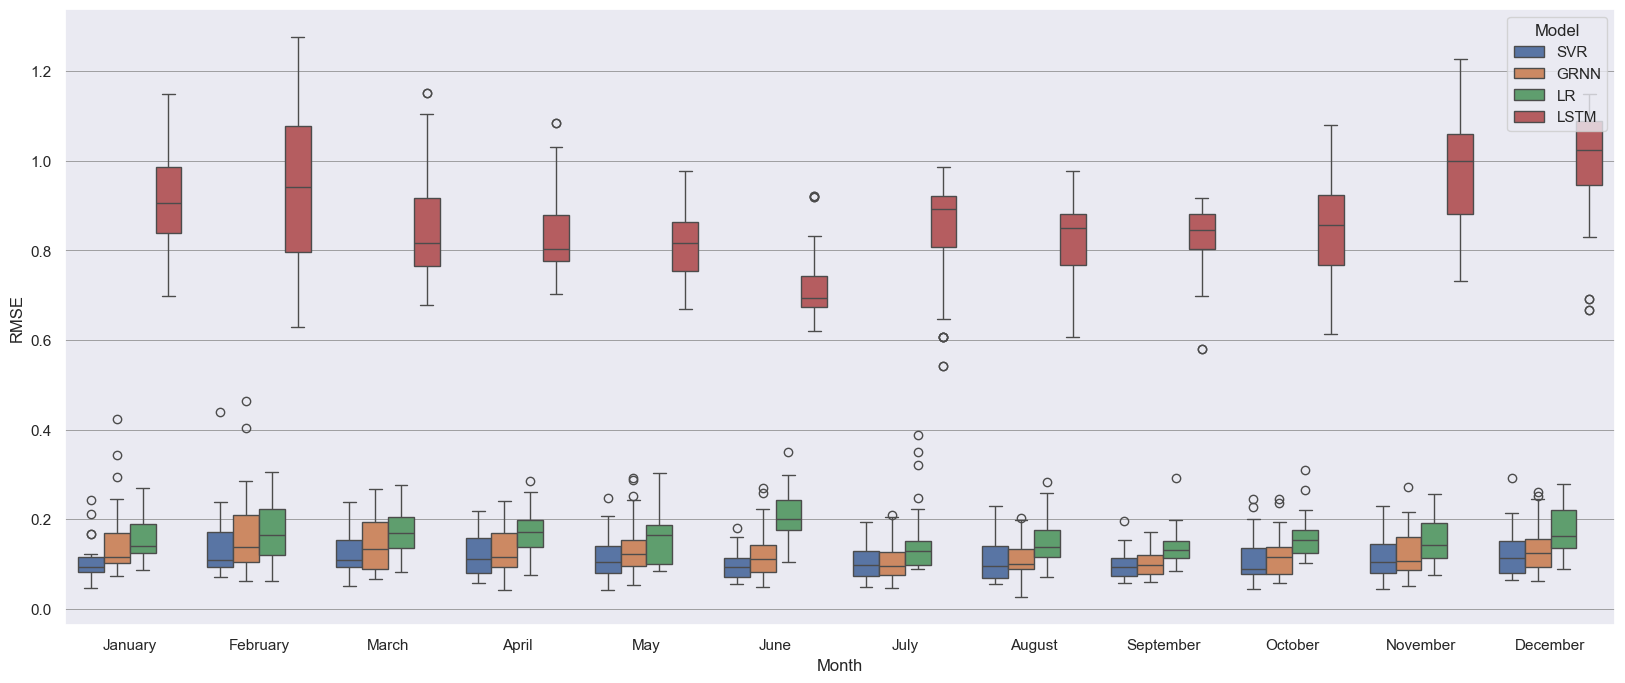

In [100]:
ax = sns.boxplot(data = df_rec, x = 'Month', y = 'RMSE', hue='Model')
fig = ax.get_figure()
sns.move_legend(ax, "upper right")
#plt.ylim(0.0, 0.6)
plt.grid(color='gray', linestyle='-', linewidth=0.5, axis = 'y')
#fig.savefig("./Resultados/RMSE_sim_rec_v2.png", transparent=True, bbox_inches = 'tight')
fig.savefig("./Resultados/RMSE_sim_rec_2023_eps.eps", transparent=True, bbox_inches = 'tight' )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


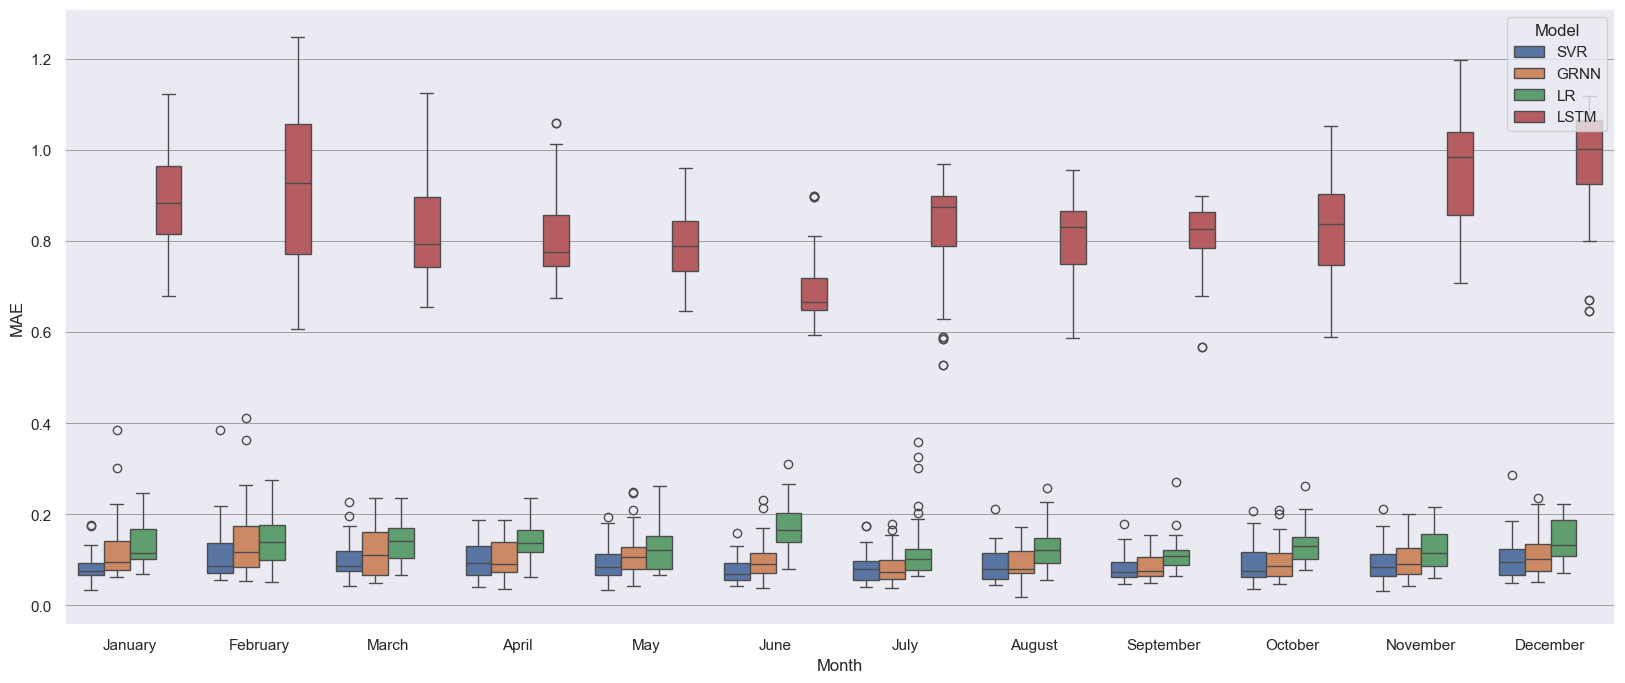

In [99]:
ax = sns.boxplot(data = df_rec, x = 'Month', y = 'MAE', hue='Model')
fig = ax.get_figure()
sns.move_legend(ax, "upper right")
#plt.ylim(0.0, 0.6)
plt.grid(color='gray', linestyle='-', linewidth=0.5, axis = 'y')

#fig.savefig("./Resultados/MAE_sim_rec.png", transparent=True, bbox_inches = 'tight')
fig.savefig("./Resultados/MAE_sim_rec_eps_2023.eps", transparent=True, bbox_inches = 'tight' )

### MIMO

In [29]:
df_mimo = df_[df_['Metodo'] == 'MIMO']

In [30]:
df_mimo_filt = df_mimo.query('R2 > -6')

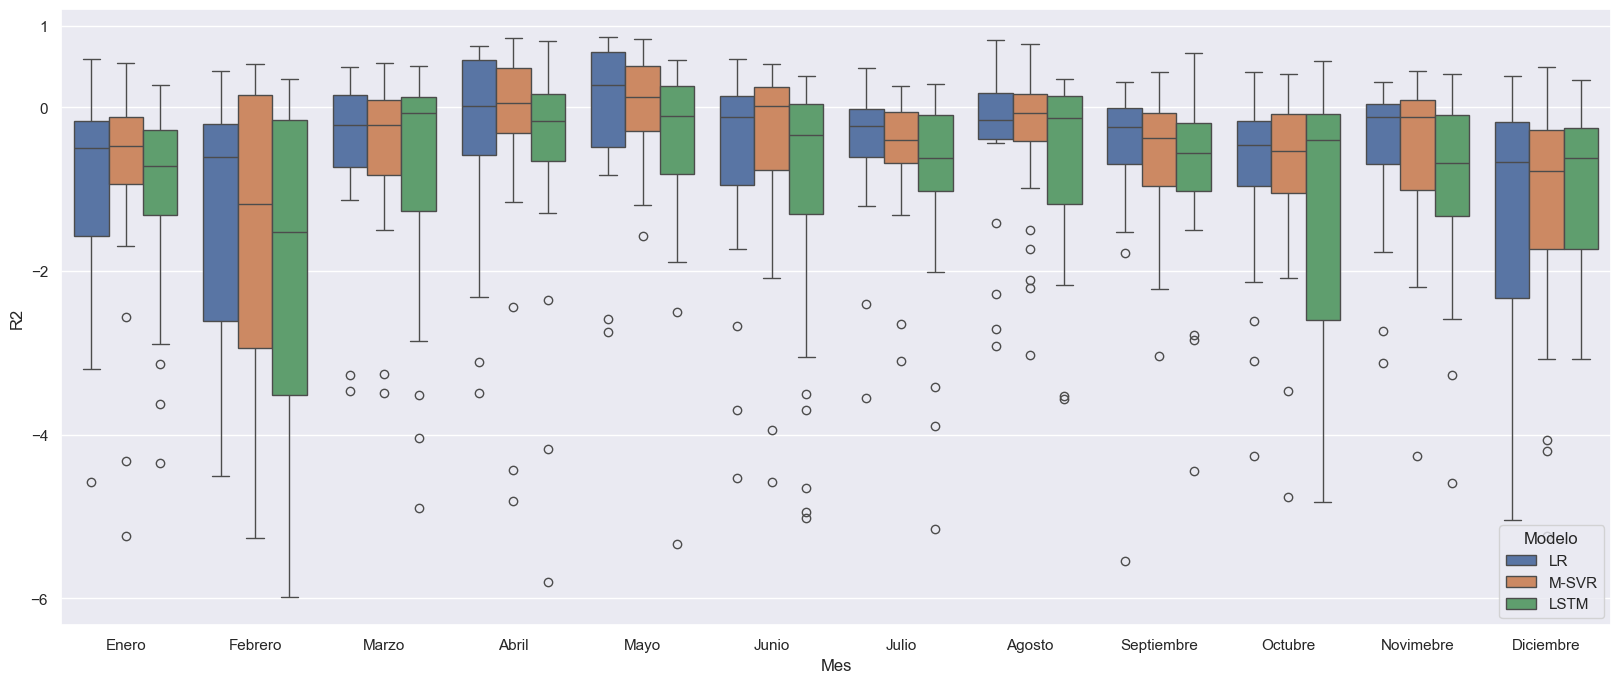

In [32]:
ax = sns.boxplot(data = df_mimo_filt, x = 'Mes', y = 'R2', hue='Modelo')
sns.move_legend(ax, "lower right")
fig = ax.get_figure()
#plt.ylim(1, -15)
plt.yticks([-6, -4, -2, 0, 1])
fig.savefig("./Resultados/R2_sim_mimo_.png", transparent=True, bbox_inches = 'tight') 

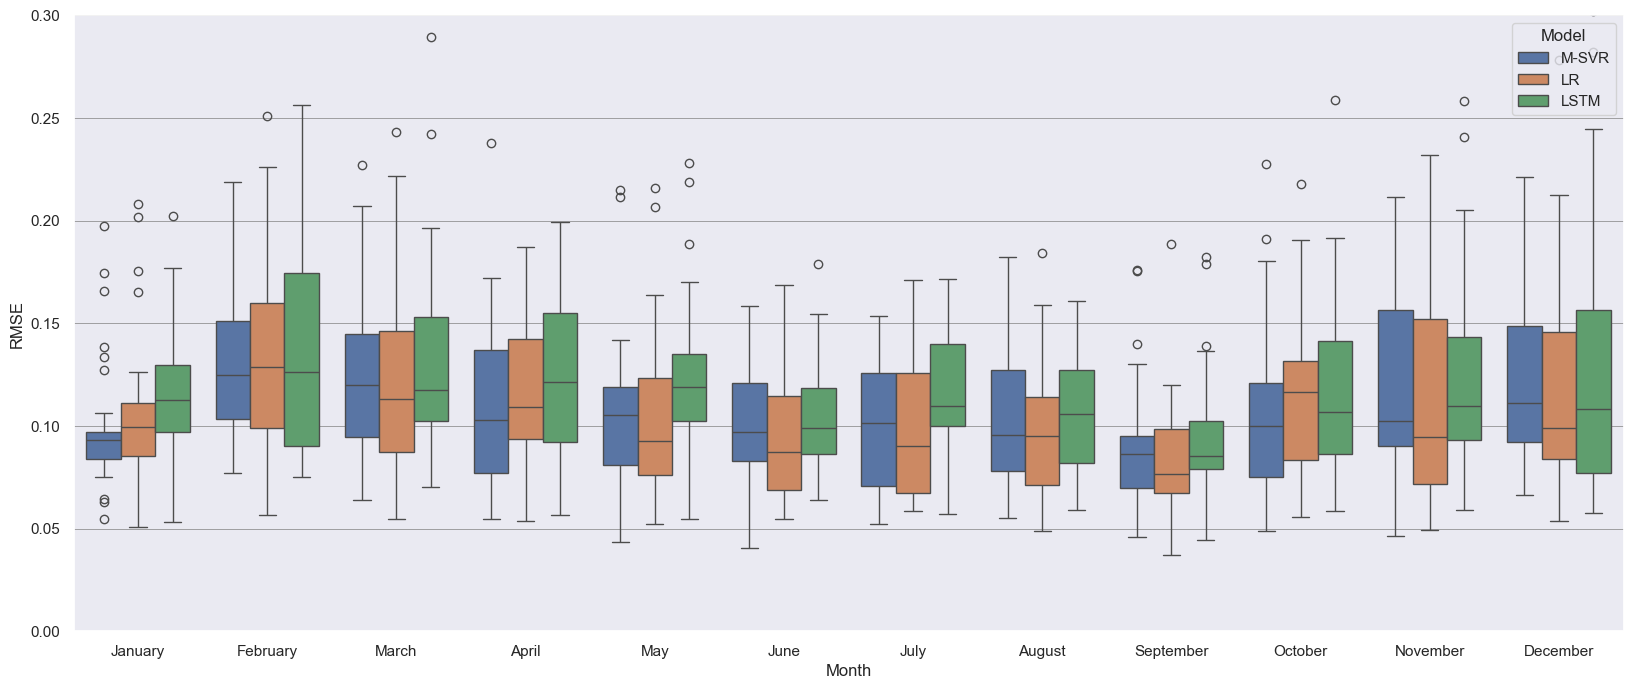

In [31]:
ax = sns.boxplot(data = df_mimo, x = 'Month', y = 'RMSE', hue='Model')
fig = ax.get_figure()
sns.move_legend(ax, "upper right")
plt.ylim(0.0, 0.30)
plt.grid(color='gray', linestyle='-', linewidth=0.5, axis = 'y')
#fig.savefig("./Resultados/RMSE_sim_mimo_2023_eps.eps", transparent=True, bbox_inches = 'tight') 

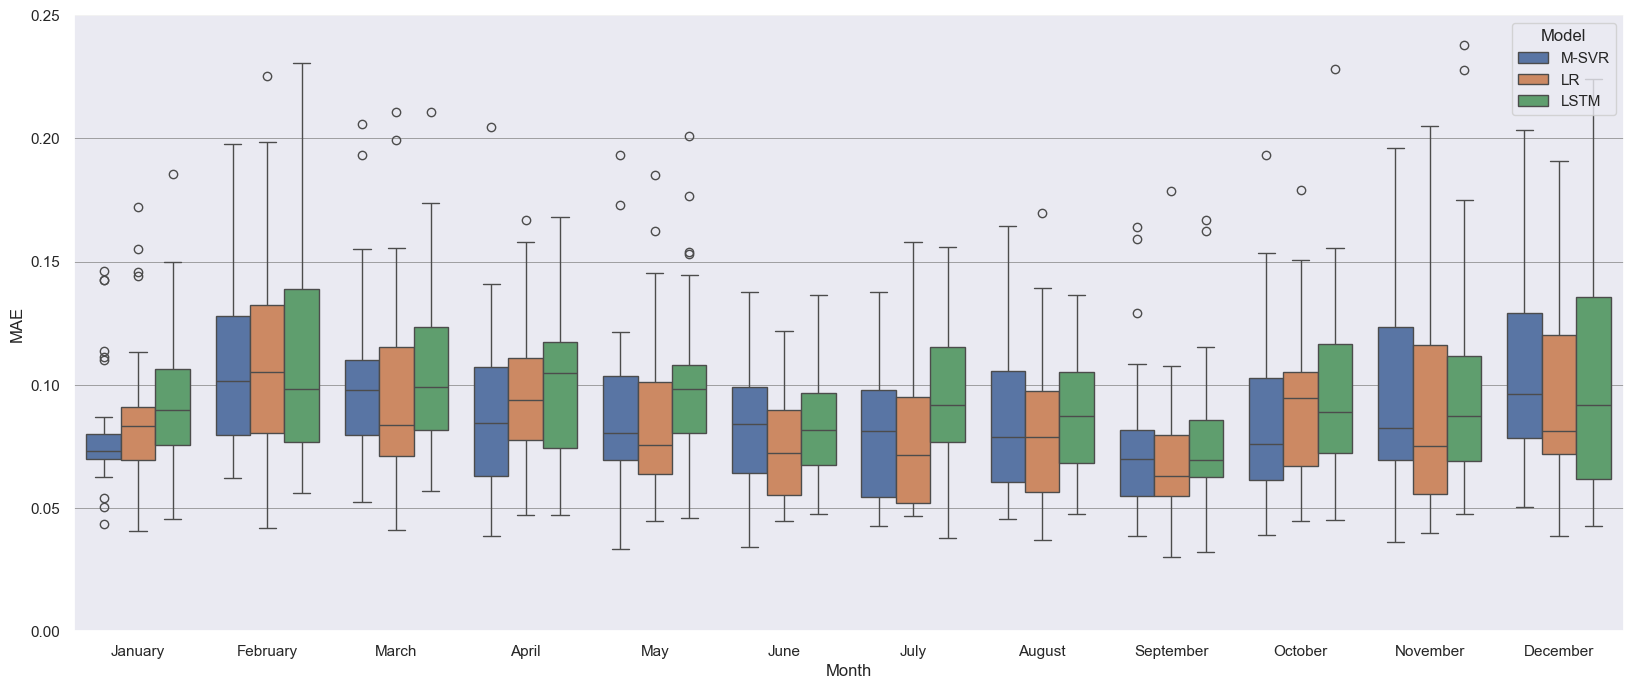

In [32]:
ax = sns.boxplot(data = df_mimo, x = 'Month', y = 'MAE', hue='Model')
fig = ax.get_figure()
sns.move_legend(ax, "upper right")
plt.ylim(0.0, 0.25)
plt.grid(color='gray', linestyle='-', linewidth=0.5, axis = 'y')

#fig.savefig("./Resultados/MAE_sim_mimo_eps_2023.eps", transparent=True, bbox_inches = 'tight') 

In [20]:
df_rec_filt = df_rec_filt[['Model', 'R2', 'RMSE', 'MAE']]

In [22]:
df_rec_filt.groupby('Model')[['R2', 'RMSE', 'MAE']].mean()

,R2,RMSE,MAE
Model,,,
GRNN,-1.027645,0.124671,0.102560
LR,-2.203959,0.159567,0.130588
LSTM,-2.358869,0.426211,0.363154
SVR,-0.739013,0.112996,0.092693


In [23]:
df_mimo_filt = df_mimo_filt[['Model', 'R2', 'RMSE', 'MAE']]

In [25]:
df_mimo_filt.groupby('Model')[['R2', 'RMSE', 'MAE']].mean()

,R2,RMSE,MAE
Model,,,
LR,-0.571796,0.107675,0.088198
LSTM,-0.837988,0.116076,0.095719
M-SVR,-0.616978,0.109462,0.089700


In [27]:
df_mimo_filt['Model'].unique()

array(['M-SVR', 'LR', 'LSTM'], dtype=object)

### Graficos de experimentacion

In [74]:
cols = ['R2', 'RMSE', 'MAE']

reg_l_r2 = [0.831128,0.834594,0.834122,0.833903]
reg_l_rmse = [0.074424,0.073657,0.073441,0.073402]
reg_l_mae = [0.056959,0.056410,0.056298,0.056193]

dataLR = {'Model': ['LR','LR','LR','LR'],
          'Horizonte': ['1', '1', '1', '1'],
        'R2': [0.831128,0.834594,0.834122,0.833903],
       'RMSE': [0.074424,0.073657,0.073441,0.073402],
       'MAE': [0.056959,0.056410,0.056298,0.056193]}

df = pd.DataFrame(dataLR)
df


,Model,Horizonte,R2,RMSE,MAE
0,LR,1,0.831128,0.074424,0.056959
1,LR,1,0.834594,0.073657,0.056410
2,LR,1,0.834122,0.073441,0.056298
3,LR,1,0.833903,0.073402,0.056193


In [75]:
dataSVR = {'Model': ['SVR','SVR','SVR','SVR'],
           'Horizonte': ['1', '1', '1', '1'],
        'R2': [0.84040,0.84171,0.83683,0.836374],
       'RMSE': [0.07234,0.07204,0.07283,0.07284],
       'MAE': [0.05487,0.05491,0.05552,0.05543]}

df_svr = pd.DataFrame(dataSVR)
df_svr

,Model,Horizonte,R2,RMSE,MAE
0,SVR,1,0.840400,0.07234,0.05487
1,SVR,1,0.841710,0.07204,0.05491
2,SVR,1,0.836830,0.07283,0.05552
3,SVR,1,0.836374,0.07284,0.05543


In [76]:
dataLSTM = {'Model': ['LSTM','LSTM','LSTM','LSTM'],
            'Horizonte': ['1', '1', '1', '1'],
        'R2': [0.83566,0.82130,0.82000,0.83047],
       'RMSE': [0.14426,0.15017,0.15067,0.14623],
       'MAE': [0.11238,0.11661,0.12082,0.11620]}
df_lstm = pd.DataFrame(dataLSTM)
df_lstm

,Model,Horizonte,R2,RMSE,MAE
0,LSTM,1,0.83566,0.14426,0.11238
1,LSTM,1,0.82130,0.15017,0.11661
2,LSTM,1,0.82000,0.15067,0.12082
3,LSTM,1,0.83047,0.14623,0.11620


In [77]:
dataLR = {'Model': ['LR','LR','LR','LR', 'LR','LR','LR','LR'],
            'Horizonte': ['24', '24', '24', '24', '24', '24', '24', '24'],
        'R2': [0.48433,0.49269,0.48876,0.48527,0.47759,0.49337,0.49300,0.49535],
       'RMSE': [0.12870,0.12740,0.12745,0.12797,0.12960,0.12733,0.12695,0.12672],
       'MAE': [0.10037,0.09958,0.09941,0.09980,0.10015,0.09861,0.09828,0.09808]}

df_lr_mimo = pd.DataFrame(dataLR)
df_lr_mimo

,Model,Horizonte,R2,RMSE,MAE
0,LR,24,0.48433,0.12870,0.10037
1,LR,24,0.49269,0.12740,0.09958
2,LR,24,0.48876,0.12745,0.09941
3,LR,24,0.48527,0.12797,0.09980
4,LR,24,0.47759,0.12960,0.10015
5,LR,24,0.49337,0.12733,0.09861
6,LR,24,0.49300,0.12695,0.09828
7,LR,24,0.49535,0.12672,0.09808


In [78]:
dataMSVR = {'Model': ['M-SVR','M-SVR','M-SVR','M-SVR', 'M-SVR','M-SVR','M-SVR','M-SVR'],
            'Horizonte': ['24', '24', '24', '24', '24', '24', '24', '24'],
        'R2': [0.58864,0.58605,0.57465,0.54757,0.59818,0.60073,0.58904,0.57990],
       'RMSE': [0.11614,0.11651,0.11759,0.12113,0.11478,0.11442,0.11558,0.11672],
       'MAE': [0.09122,0.09161,0.09229,0.09479,0.09021,0.08973,0.09028,0.09084]}

df_msvr = pd.DataFrame(dataMSVR)
df_msvr

,Model,Horizonte,R2,RMSE,MAE
0,M-SVR,24,0.58864,0.11614,0.09122
1,M-SVR,24,0.58605,0.11651,0.09161
2,M-SVR,24,0.57465,0.11759,0.09229
3,M-SVR,24,0.54757,0.12113,0.09479
4,M-SVR,24,0.59818,0.11478,0.09021
5,M-SVR,24,0.60073,0.11442,0.08973
6,M-SVR,24,0.58904,0.11558,0.09028
7,M-SVR,24,0.57990,0.11672,0.09084


In [79]:
dataLSTM = {'Model': ['LSTM','LSTM','LSTM','LSTM', 'LSTM','LSTM','LSTM','LSTM'],
            'Horizonte': ['24', '24', '24', '24', '24', '24', '24', '24'],
        'R2': [0.49490,0.48702,0.45485,0.50291,0.46756,0.49348,0.48805,0.48746],
       'RMSE': [0.24571,0.24725,0.25253,0.24217,0.25151,0.24560,0.24598,0.24544],
       'MAE': [0.19962,0.19957,0.20741,0.19723,0.20484,0.19856,0.19889,0.19933]}

df_lstm_mimo = pd.DataFrame(dataLSTM)
df_lstm_mimo

,Model,Horizonte,R2,RMSE,MAE
0,LSTM,24,0.49490,0.24571,0.19962
1,LSTM,24,0.48702,0.24725,0.19957
2,LSTM,24,0.45485,0.25253,0.20741
3,LSTM,24,0.50291,0.24217,0.19723
4,LSTM,24,0.46756,0.25151,0.20484
5,LSTM,24,0.49348,0.24560,0.19856
6,LSTM,24,0.48805,0.24598,0.19889
7,LSTM,24,0.48746,0.24544,0.19933


In [29]:
df_c = pd.concat([df, df_svr, df_lstm, df_lr_mimo, df_msvr, df_lstm_mimo])
df_c

NameError: name 'df' is not defined

<Axes: xlabel='Model', ylabel='RMSE'>

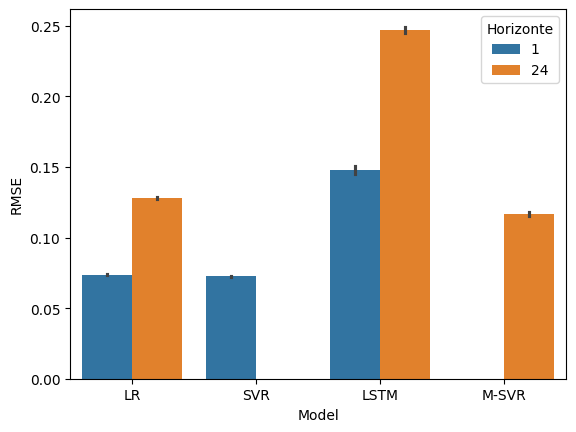

In [84]:
#dfc = df_c[['Model', 'Metodo', 'RMSE', 'MAE']]
#dfc = dfc.melt(id_vars=["Model", "Metodo"], var_name='metricas')
#dfc
sns.barplot(data = df_c, x = 'Model', y = 'RMSE', hue = 'Horizonte')

<Axes: xlabel='Model', ylabel='RMSE'>

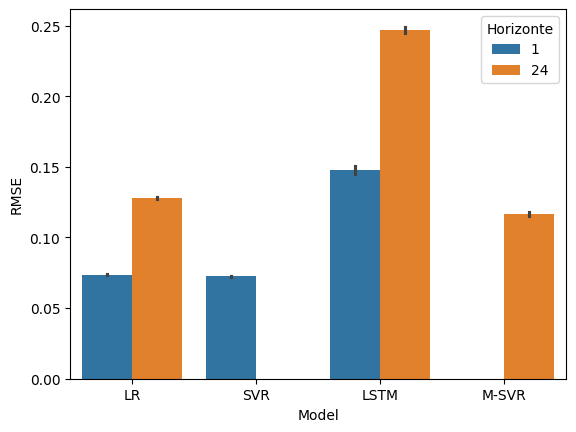

In [85]:
#dfc = df_c[['Model', 'Metodo', 'RMSE', 'MAE']]
#dfc = dfc.melt(id_vars=["Model", "Metodo"], var_name='metricas')
#dfc
sns.barplot(data = df_c, x = 'Model', y = 'RMSE', hue = 'Horizonte')

In [28]:
dfc = df_c[['Model', 'Horizonte', 'RMSE', 'MAE']]
dfc = dfc.melt(id_vars=["Model", "Horizonte"], var_name='metrica')
#dfc
#g = sns.catplot(kind='bar', data=df, col='group', x='bar', y='value', hue='bar', palette='rocket', dodge=False, sharex=False)
#plt.tight_layout()
#plt.show()

NameError: name 'df_c' is not defined

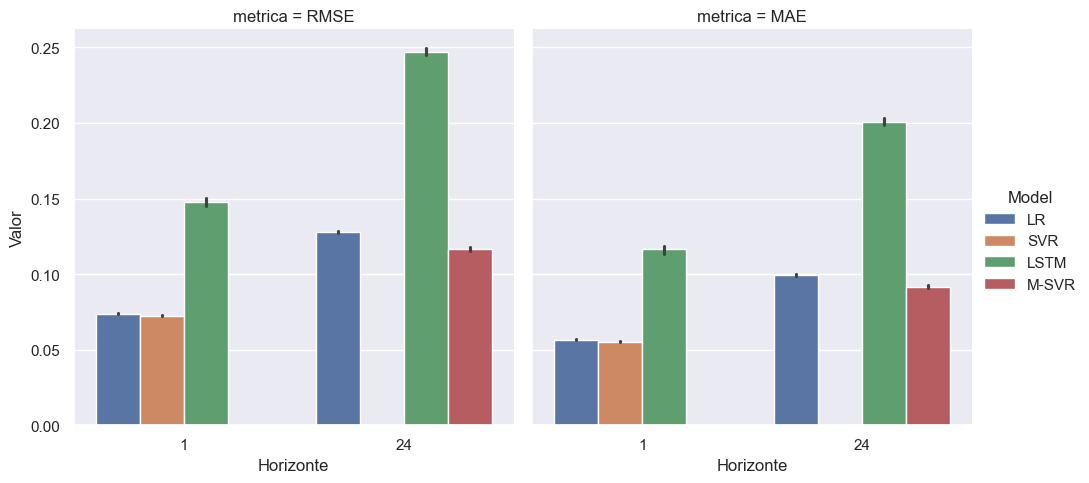

In [177]:
ax = sns.catplot(kind = 'bar', data=dfc, col='metrica', x='Horizonte', y = 'value', hue = 'Model', dodge=True)
ax.set(xlabel = 'Horizonte', ylabel = 'Valor')

ax.savefig("./Resultados/Metrica_prueba.png", transparent=True, bbox_inches = 'tight')
#fig.savefig("./Resultados/Metrica_prueba.png", transparent=True, bbox_inches = 'tight')


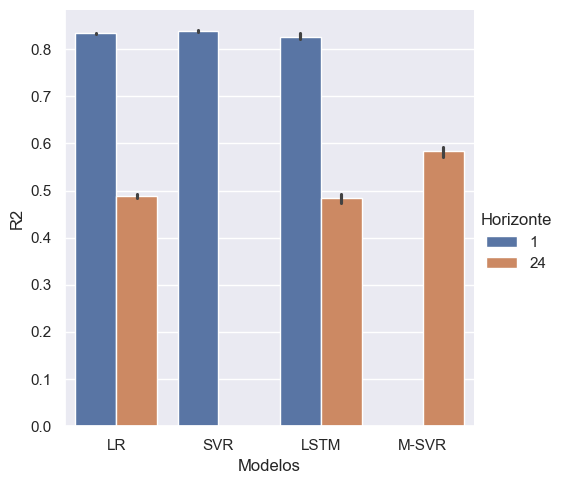

In [156]:
ax = sns.catplot(kind='bar', data=df_c, x='Model', y='R2', hue='Horizonte', dodge=True)
ax.set(xlabel = 'Modelos', ylabel = 'R2')
ax.savefig("./Resultados/Metrica_prueba_r2.png", transparent=True, bbox_inches = 'tight')

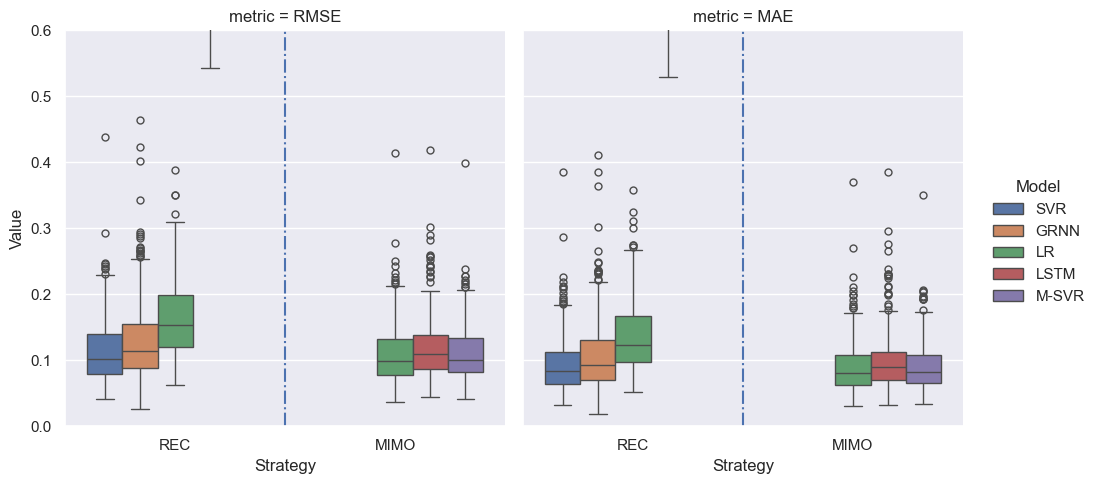

In [44]:
dfs = df_[['Model', 'Metodo', 'RMSE', 'MAE']]
dfs = dfs.melt(id_vars=["Model", "Metodo"], var_name='metric')
#sns.set_style("whitegrid")
ax = sns.catplot(kind = 'box', data=dfs, col='metric', x='Metodo', y = 'value', hue = 'Model', dodge=True, flierprops={"marker": "o", "markerfacecolor":'none'})
ax.refline(x = 0.5, linestyle='-.', color=None)
ax.set(xlabel = 'Strategy', ylabel = 'Value', ylim = (0.0, 0.6))
#plt.show()
#ax.grid(color='gray', linestyle='-', linewidth=0.5, axis = 'y')
#ax.savefig("./Resultados/Metrica_sim.png", transparent=False, bbox_inches = 'tight')
#ax.savefig("./Resultados/Metrica_sim_eps.eps", transparent=True, bbox_inches = 'tight')

#fig.savefig("./Resultados/Metrica_prueba.png", transparent=True, bbox_inches = 'tight')

In [23]:
df_mimo = df_[df_['Metodo'] == 'MIMO']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


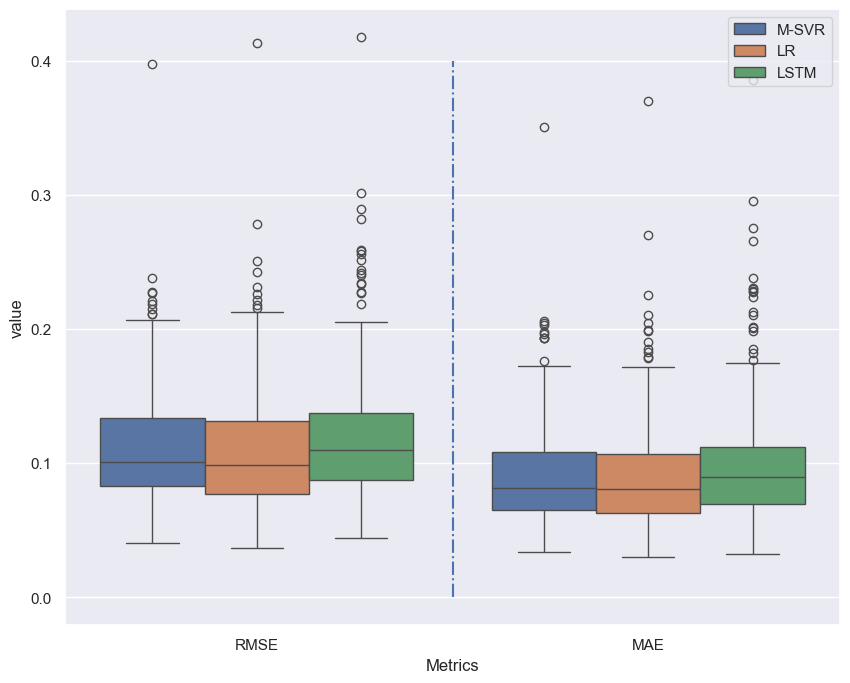

In [47]:
sns.set(rc={'figure.figsize':(10,8)})
dfs = df_mimo[['Model', 'RMSE', 'MAE']]
dfs = dfs.melt(id_vars=["Model"], var_name='Metrics')

sns.boxplot(data=dfs, x='Metrics', y = 'value', hue = 'Model')
plt.legend(loc = 'upper right')
plt.vlines(x = 0.5, ymin = 0.0, ymax = 0.40, linestyle='-.', color=None)
#vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)

#plt.show()
#ax.grid(color='gray', linestyle='-', linewidth=0.5, axis = 'y')
#ax.savefig("./Resultados/Metrica_sim.png", transparent=False, bbox_inches = 'tight')
#ax.savefig("./Resultados/Metrica_sim_eps.eps", transparent=True, bbox_inches = 'tight')

plt.savefig("./Resultados/Metrica_simulacion_2023_eps.eps", transparent=True, bbox_inches = 'tight')

In [20]:
dfs

,Model,RMSE,MAE
1364,M-SVR,0.082353,0.062605
1365,M-SVR,0.165556,0.142571
1366,M-SVR,0.084222,0.065226
1367,M-SVR,0.106128,0.086889
1368,M-SVR,0.075261,0.064629
...,...,...,...
2370,LSTM,0.128970,0.117251
2371,LSTM,0.282060,0.275713
2372,LSTM,0.197969,0.182103
2373,LSTM,0.173635,0.146358


In [21]:
dfs = df_[['Model', 'Metodo', 'RMSE', 'MAE']]
dfs = dfs.melt(id_vars=["Model", "Metodo"], var_name='metric')

In [22]:
dfs

,Model,Metodo,metric,value
0,SVR,REC,RMSE,0.066125
1,SVR,REC,RMSE,0.167073
2,SVR,REC,RMSE,0.091286
3,SVR,REC,RMSE,0.097328
4,SVR,REC,RMSE,0.078298
...,...,...,...,...
4745,LSTM,MIMO,MAE,0.117251
4746,LSTM,MIMO,MAE,0.275713
4747,LSTM,MIMO,MAE,0.182103
4748,LSTM,MIMO,MAE,0.146358
